<a href="https://colab.research.google.com/github/samp3209/datamining/blob/main/dataminingfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import multiprocessing
#data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
#library for processing objects structured like emails
import email


In [3]:
#example of multi-class classification task
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import pandas as pd

In [96]:
df = pd.read_csv("final_proj_data.csv")
len(df)

94592

In [97]:
# transform the email into correct format
message = df.loc[1]['message']
#uses the new library 'email'
e = email.message_from_string(message)

e.items()
# get date
e.get('Date')
# show message body
e.get_payload()

"Palu,\r\n \r\nAre we getting a portion of the 49C2 conference video?  We are getting something from one of the video rooms.  any ideas?\r\n \r\nThanks, Kim.\r\n-----Original Message-----\r\nFrom: Robertson, Audrey \r\nSent: Tuesday, August 14, 2001 9:41 AM\r\nTo: Watson, Kimberly\r\nCc: Harris, Steven\r\nSubject: FW: Video Conference Room\r\n\r\n\r\n    FYI,\r\n \r\n -----Original Message-----\r\nFrom: Jones, Dana \r\nSent: Tuesday, August 14, 2001 9:40 AM\r\nTo: Robertson, Audrey\r\nCc: Gilbert, Steve\r\nSubject: RE: Video Conference Room\r\n\r\n\r\nAudrey,  No Steve Harris's cost center is not currently charged for use of the video conference.  We are however currently assessing allocating some portion of the cost to the various users.\r\n \r\nDana\r\n \r\n\r\n-----Original Message-----\r\nFrom: Robertson, Audrey \r\nSent: Tuesday, August 14, 2001 7:55 AM\r\nTo: Jones, Dana\r\nCc: Cappiello, Deborah; Watson, Kimberly\r\nSubject: FW: Video Conference Room\r\n\r\n\r\nDana, would you b

In [98]:
# now we add those fields into our 'df' dataframe
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

In [99]:
df['date'] = get_field("Date", df['message'])
df['subject'] = get_field("Subject", df['message'])
df['X-Folder'] = get_field("X-Folder", df['message'])
df['X-From'] = get_field("X-From", df['message'])
df['X-To'] = get_field("X-To", df['message'])
df.head(3)

,Unnamed: 0,Unnamed,file,message,date,subject,X-Folder,X-From,X-To,body,employee,label
0,1,2,shackleton-s/notes_inbox/2286.,Message-ID: <12206143.1075844795936.JavaMail.e...,"Mon, 7 May 2001 02:37:00 -0700 (PDT)",(01-149) Silver and Gold Options Expiration Op...,\Sara_Shackleton_Dec2000_June2001_2\Notes Fold...,exchangeinfo@nymex.com,sara.shackleton@enron.com,"Notice No. 01-149\r\nMay 7, 2001\r\n\r\nTO:\r\...",shackleton-s,Not Spam
1,3,4,watson-k/sent_items/146.,Message-ID: <6768695.1075852893849.JavaMail.ev...,"Tue, 14 Aug 2001 07:56:51 -0700 (PDT)",FW: Video Conference Room,"\KWATSON (Non-Privileged)\Watson, Kimberly\Sen...","Watson, Kimberly </O=ENRON/OU=NA/CN=RECIPIENTS...","Goradia, Pallavi </O=ENRON/OU=NA/CN=RECIPIENTS...","Palu,\r\n \r\nAre we getting a portion of the ...",watson-k,Not Spam
2,4,5,causholli-m/deleted_items/15.,Message-ID: <4383187.1075853152536.JavaMail.ev...,"Fri, 26 Oct 2001 16:11:01 -0700 (PDT)",Solicitation Calls,\MCAUSHOL (Non-Privileged)\Deleted Items,"Office of the Chairman, </O=ENRON/OU=NA/CN=REC...",All Enron Worldwide@ENRON,"Trade press, recruiting firms and others recen...",causholli-m,Not Spam


In [100]:
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

df['body'] = body(df['message'])
df.head(3)

,Unnamed: 0,Unnamed,file,message,date,subject,X-Folder,X-From,X-To,body,employee,label
0,1,2,shackleton-s/notes_inbox/2286.,Message-ID: <12206143.1075844795936.JavaMail.e...,"Mon, 7 May 2001 02:37:00 -0700 (PDT)",(01-149) Silver and Gold Options Expiration Op...,\Sara_Shackleton_Dec2000_June2001_2\Notes Fold...,exchangeinfo@nymex.com,sara.shackleton@enron.com,"Notice No. 01-149\r\nMay 7, 2001\r\n\r\nTO:\r\...",shackleton-s,Not Spam
1,3,4,watson-k/sent_items/146.,Message-ID: <6768695.1075852893849.JavaMail.ev...,"Tue, 14 Aug 2001 07:56:51 -0700 (PDT)",FW: Video Conference Room,"\KWATSON (Non-Privileged)\Watson, Kimberly\Sen...","Watson, Kimberly </O=ENRON/OU=NA/CN=RECIPIENTS...","Goradia, Pallavi </O=ENRON/OU=NA/CN=RECIPIENTS...","Palu,\r\n \r\nAre we getting a portion of the ...",watson-k,Not Spam
2,4,5,causholli-m/deleted_items/15.,Message-ID: <4383187.1075853152536.JavaMail.ev...,"Fri, 26 Oct 2001 16:11:01 -0700 (PDT)",Solicitation Calls,\MCAUSHOL (Non-Privileged)\Deleted Items,"Office of the Chairman, </O=ENRON/OU=NA/CN=REC...",All Enron Worldwide@ENRON,"Trade press, recruiting firms and others recen...",causholli-m,Not Spam


In [101]:
def employee(file):
    column = []
    for string in file:
        column.append(string.split("/")[0])
    return column

df['employee'] = employee(df['file'])
df.head(3)

,Unnamed: 0,Unnamed,file,message,date,subject,X-Folder,X-From,X-To,body,employee,label
0,1,2,shackleton-s/notes_inbox/2286.,Message-ID: <12206143.1075844795936.JavaMail.e...,"Mon, 7 May 2001 02:37:00 -0700 (PDT)",(01-149) Silver and Gold Options Expiration Op...,\Sara_Shackleton_Dec2000_June2001_2\Notes Fold...,exchangeinfo@nymex.com,sara.shackleton@enron.com,"Notice No. 01-149\r\nMay 7, 2001\r\n\r\nTO:\r\...",shackleton-s,Not Spam
1,3,4,watson-k/sent_items/146.,Message-ID: <6768695.1075852893849.JavaMail.ev...,"Tue, 14 Aug 2001 07:56:51 -0700 (PDT)",FW: Video Conference Room,"\KWATSON (Non-Privileged)\Watson, Kimberly\Sen...","Watson, Kimberly </O=ENRON/OU=NA/CN=RECIPIENTS...","Goradia, Pallavi </O=ENRON/OU=NA/CN=RECIPIENTS...","Palu,\r\n \r\nAre we getting a portion of the ...",watson-k,Not Spam
2,4,5,causholli-m/deleted_items/15.,Message-ID: <4383187.1075853152536.JavaMail.ev...,"Fri, 26 Oct 2001 16:11:01 -0700 (PDT)",Solicitation Calls,\MCAUSHOL (Non-Privileged)\Deleted Items,"Office of the Chairman, </O=ENRON/OU=NA/CN=REC...",All Enron Worldwide@ENRON,"Trade press, recruiting firms and others recen...",causholli-m,Not Spam


In [102]:
unique_emails = pd.DataFrame(df['X-Folder'].value_counts())
unique_emails.reset_index(inplace=True)


unique_emails.columns = ['folder_name', 'count']
# top 20 folders
unique_emails.iloc[:20,:]

,folder_name,count
0,\Kay_Mann_June2001_1\Notes Folders\All documents,1225
1,\Tanya_Jones_Dec2000\Notes Folders\All documents,1109
2,\Jeff_Dasovich_June2001\Notes Folders\All docu...,1003
3,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,992
4,\Kay_Mann_June2001_2\Notes Folders\Discussion ...,979
5,\Vincent_Kaminski_Jun2001_1\Notes Folders\All ...,914
6,\Kay_Mann_June2001_3\Notes Folders\Sent,882
7,\Kay_Mann_June2001_4\Notes Folders\'sent mail,818
8,\Jeff_Dasovich_Dec2000\Notes Folders\All docum...,815
9,\Mark_Taylor _Dec_2000\Notes Folders\All docum...,794


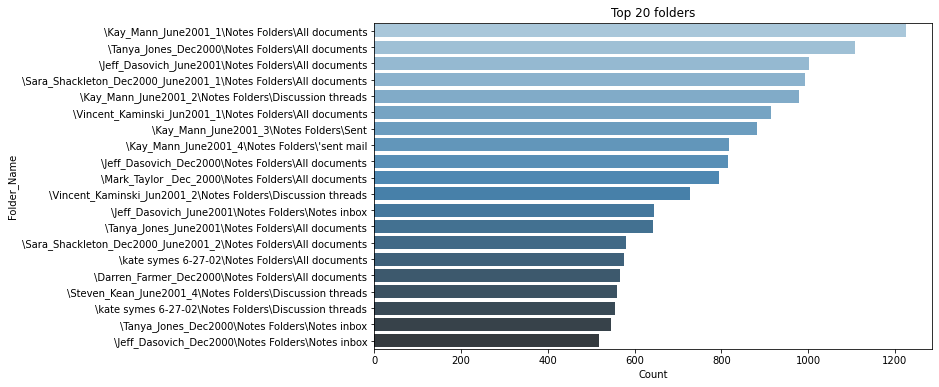

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='folder_name', data=unique_emails.iloc[:20, :], palette="Blues_d")
plt.title("Top 20 folders")
plt.xlabel("Count")
plt.ylabel("Folder_Name")
plt.show()

In [103]:
top_20 = pd.DataFrame(df['employee'].value_counts()[:20])
top_20.reset_index(inplace=True)
top_20.columns = ["Employee_name", "Counts"]
top_20

,Employee_name,Counts
0,kaminski-v,5152
1,dasovich-j,5032
2,kean-s,4528
3,mann-k,4494
4,jones-t,3778
5,shackleton-s,3607
6,taylor-m,2591
7,farmer-d,2483
8,germany-c,2305
9,beck-s,2217


In [104]:
import datetime
from dateutil import parser

# this is sample example
x = parser.parse("Fri, 4 May 2001 13:51:00 -0700 (PDT)")
print(x.strftime("%d-%m-%Y %H:%M:%S"))

04-05-2001 13:51:00


In [105]:
def change_type(dates):
    column = []
    
    for date in dates:
        column.append(parser.parse(date).strftime("%d-%m-%Y %H:%M:%S"))
    return column

df['date'] = change_type(df['date'])
df.head(2)

,Unnamed: 0,Unnamed,file,message,date,subject,X-Folder,X-From,X-To,body,employee,label
0,1,2,shackleton-s/notes_inbox/2286.,Message-ID: <12206143.1075844795936.JavaMail.e...,07-05-2001 02:37:00,(01-149) Silver and Gold Options Expiration Op...,\Sara_Shackleton_Dec2000_June2001_2\Notes Fold...,exchangeinfo@nymex.com,sara.shackleton@enron.com,"Notice No. 01-149\r\nMay 7, 2001\r\n\r\nTO:\r\...",shackleton-s,Not Spam
1,3,4,watson-k/sent_items/146.,Message-ID: <6768695.1075852893849.JavaMail.ev...,14-08-2001 07:56:51,FW: Video Conference Room,"\KWATSON (Non-Privileged)\Watson, Kimberly\Sen...","Watson, Kimberly </O=ENRON/OU=NA/CN=RECIPIENTS...","Goradia, Pallavi </O=ENRON/OU=NA/CN=RECIPIENTS...","Palu,\r\n \r\nAre we getting a portion of the ...",watson-k,Not Spam


In [106]:
print(df['X-Folder'][0])

# we only want last folder name
df['X-Folder'][0].split("\\")[-1]

\Sara_Shackleton_Dec2000_June2001_2\Notes Folders\Notes inbox


'Notes inbox'

In [107]:
def preprocess_folder(folders):
    column = []
    for folder in folders:
        if (folder is None or folder == ""):
            column.append(np.nan)
        else:
            column.append(folder.split("\\")[-1].lower())
    return column

df['X-Folder'] = preprocess_folder(df['X-Folder'])
df.head(2)

,Unnamed: 0,Unnamed,file,message,date,subject,X-Folder,X-From,X-To,body,employee,label
0,1,2,shackleton-s/notes_inbox/2286.,Message-ID: <12206143.1075844795936.JavaMail.e...,07-05-2001 02:37:00,(01-149) Silver and Gold Options Expiration Op...,notes inbox,exchangeinfo@nymex.com,sara.shackleton@enron.com,"Notice No. 01-149\r\nMay 7, 2001\r\n\r\nTO:\r\...",shackleton-s,Not Spam
1,3,4,watson-k/sent_items/146.,Message-ID: <6768695.1075852893849.JavaMail.ev...,14-08-2001 07:56:51,FW: Video Conference Room,sent items,"Watson, Kimberly </O=ENRON/OU=NA/CN=RECIPIENTS...","Goradia, Pallavi </O=ENRON/OU=NA/CN=RECIPIENTS...","Palu,\r\n \r\nAre we getting a portion of the ...",watson-k,Not Spam


In [108]:
def replace_empty_with_nan(subject):
    column = []
    for val in subject:
        if (val == ""):
            column.append(np.nan) 
        else:
            column.append(val)
    return column

In [109]:
df['subject'] = replace_empty_with_nan(df['subject'])
df['X-To'] = replace_empty_with_nan(df['X-To'])

In [112]:
# drop missing value rows
df.dropna(axis=0, inplace=True)
len(df)

94592

In [111]:
#Feature creation
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['le_Xfrom'] = label_encoder.fit_transform(df['X-From'])
df['le_subject'] = label_encoder.fit_transform(df['subject'])
df['date'] = pd.to_datetime(df['date'])
#df.dtypes
df['hour'] = df.date.dt.hour
df['weekday'] = df.date.dt.weekday


In [47]:
#decision tree using all features
X = df[['hour', 'weekday', 'le_subject', 'le_Xfrom']]
y = df['label']

tree_scores = [None]*100
depth_of_tree = [None]*100
leaves_of_tree = [None]*100

for i in range(0,99):
	#Implement train_test_split
	X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)

	#code for  k means cluster analysis with sklearn
	#km = KMeans(n_clusters=2).fit(X_train)
 
	#code for Decision tree classifier
	clf = DecisionTreeClassifier(max_depth=5).fit(X_train, Y_train)

	#y_pred = km.predict(X_test)
	y_tree_pred = clf.predict(X_test)
	#kmeans_scores[i] = accuracy_score(y_pred, Y_test)
	tree_scores[i] = clf.score(X_test, Y_test)
	depth_of_tree[i] = clf.get_depth()
	leaves_of_tree[i] = clf.get_n_leaves()
 

print("Tree Accuracy:\n", pd.Series(tree_scores).describe())
print("Tree Depths:\n", pd.Series(depth_of_tree).describe())
print("Tree Depths:\n", pd.Series(leaves_of_tree).describe())

Tree Accuracy:
 count    99.000000
mean      0.950216
std       0.001807
min       0.945082
25%       0.948993
50%       0.950314
75%       0.951372
max       0.953803
dtype: float64
Tree Depths:
 count    99.0
mean      5.0
std       0.0
min       5.0
25%       5.0
50%       5.0
75%       5.0
max       5.0
dtype: float64
Tree Depths:
 count    99.000000
mean     26.868687
std       0.443697
min      24.000000
25%      27.000000
50%      27.000000
75%      27.000000
max      27.000000
dtype: float64


In [48]:
#decision tree using only label encoded features which is the most accurate 
X = df[['le_subject', 'le_Xfrom']]
y = df['label']

tree_scores = [None]*100
depth_of_tree = [None]*100
leaves_of_tree = [None]*100

for i in range(0,99):
	#Implement train_test_split
	X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)

	#code for  k means cluster analysis with sklearn
	#km = KMeans(n_clusters=2).fit(X_train)
 
	#code for Decision tree classifier
	clf = DecisionTreeClassifier(max_depth=5).fit(X_train, Y_train)

	#y_pred = km.predict(X_test)
	y_tree_pred = clf.predict(X_test)
	#kmeans_scores[i] = accuracy_score(y_pred, Y_test)
	tree_scores[i] = clf.score(X_test, Y_test)
	depth_of_tree[i] = clf.get_depth()
	leaves_of_tree[i] = clf.get_n_leaves()
 

print("Tree Accuracy:\n", pd.Series(tree_scores).describe())
print("Tree Depths:\n", pd.Series(depth_of_tree).describe())
print("Tree Depths:\n", pd.Series(leaves_of_tree).describe())

Tree Accuracy:
 count    99.000000
mean      0.961158
std       0.001414
min       0.958560
25%       0.960040
50%       0.961150
75%       0.962075
max       0.964956
dtype: float64
Tree Depths:
 count    99.0
mean      5.0
std       0.0
min       5.0
25%       5.0
50%       5.0
75%       5.0
max       5.0
dtype: float64
Tree Depths:
 count    99.000000
mean     21.030303
std       0.172292
min      21.000000
25%      21.000000
50%      21.000000
75%      21.000000
max      22.000000
dtype: float64


In [45]:
X = df[['hour', 'weekday']]
y = df['label']

tree_scores = [None]*100
depth_of_tree = [None]*100
leaves_of_tree = [None]*100

for i in range(0,99):
	#Implement train_test_split
	X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)

	#code for  k means cluster analysis with sklearn
	#km = KMeans(n_clusters=2).fit(X_train)
 
	#code for Decision tree classifier
	clf = DecisionTreeClassifier(max_depth=5).fit(X_train, Y_train)

	#y_pred = km.predict(X_test)
	y_tree_pred = clf.predict(X_test)
	#kmeans_scores[i] = accuracy_score(y_pred, Y_test)
	tree_scores[i] = clf.score(X_test, Y_test)
	depth_of_tree[i] = clf.get_depth()
	leaves_of_tree[i] = clf.get_n_leaves()
 

print("Tree Accuracy:\n", pd.Series(tree_scores).describe())
print("Tree Depths:\n", pd.Series(depth_of_tree).describe())
print("Tree Depths:\n", pd.Series(leaves_of_tree).describe())

Tree Accuracy:
 count    99.000000
mean      0.910863
std       0.001895
min       0.906338
25%       0.909641
50%       0.910725
75%       0.912284
max       0.914953
dtype: float64
Tree Depths:
 count    99.0
mean      5.0
std       0.0
min       5.0
25%       5.0
50%       5.0
75%       5.0
max       5.0
dtype: float64
Tree Depths:
 count    99.000000
mean     26.585859
std       0.756065
min      25.000000
25%      26.000000
50%      27.000000
75%      27.000000
max      28.000000
dtype: float64


The features I'm going to be using for the optimal datamodel are gonna be the label encoded subject and encoded X-from given that these two features give the highest accuracy even more than using all of the features. 

In [93]:
tdata = pd.read_csv("NewData (1).csv")
# transform the email into correct format
message = tdata.loc[1]['message']
#uses the new library 'email'
e = email.message_from_string(message)

e.items()
# get date
e.get('Date')
# show message body
e.get_payload()

'\r\n[IMAGE] =09\r\n\r\n\r\n    Search   BooksAll Products  for         Dear Amazon.com Customer,  As s=\r\nomeone who has purchased books by Henry Cloud in the past, you might  like =\r\nto know that How People Grow : What the Bible Reveals About  Personal Growt=\r\nh is now available.  You can order your copy at a savings  of 30% by follow=\r\ning the link below.      [IMAGE]  How  People Grow : What the Bible Reveals=\r\n About Personal Growth  List Price:  $19.99  Our Price: $13.99  You Save: $=\r\n6.00  (30%)    [IMAGE]   Amazon.com Whether you\'re hoping to achieve person=\r\nal and spiritual growth or are  looking for guidance to help others, you\'ll=\r\n find practical and proven  wisdom in Drs. Henry Cloud and John Townsend\'s =\r\nHow People Grow: What the  Bible Reveals About Personal Growth. Starting wi=\r\nth the premise that all  growth is spiritual growth, the authors then expou=\r\nnd on the concept. Cloud  postulates that we spend too much time focusing o=\r\nn problem

In [94]:
# now we add those fields into our 'df' dataframe
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

In [95]:
tdata['date'] = get_field("Date", tdata['message'])
tdata['subject'] = get_field("Subject", tdata['message'])
tdata['X-Folder'] = get_field("X-Folder", tdata['message'])
tdata['X-From'] = get_field("X-From", tdata['message'])
tdata['X-To'] = get_field("X-To", tdata['message'])
tdata.head(3)
print(len(tdata))

10000


In [78]:
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

tdata['body'] = body(tdata['message'])
tdata.head(3)

,Unnamed: 0,Unnamed,file,message,label,date,subject,X-Folder,X-From,X-To,body
0,0,1,badeer-r/discussion_threads/212.,Message-ID: <13581696.1075863601488.JavaMail.e...,0.0,"Thu, 24 Aug 2000 09:55:00 -0700 (PDT)",Total Transfer Capabilities,\Robert_Badeer_Aug2000\Notes Folders\Discussio...,"""Neeley, Myrna"" <MNeeley@caiso.com>","Market Status <MarketStatus@caiso.com>, PX Rea...",Attached are the Total Transfer Capabilities (...
1,1,2,allen-p/deleted_items/189.,Message-ID: <7027882.1075858635275.JavaMail.ev...,0.0,"Wed, 24 Oct 2001 21:45:42 -0700 (PDT)","Save 30% on ""How People Grow : What the Bible ...","\PALLEN (Non-Privileged)\Allen, Phillip K.\Del...","""Amazon.com"" <book-news@amazon.com>@ENRON",pallen@enron.com,\r\n[IMAGE] =09\r\n\r\n\r\n Search BooksA...
2,2,3,arnold-j/all_documents/331.,Message-ID: <23580308.1075857574590.JavaMail.e...,0.0,"Wed, 4 Oct 2000 01:23:00 -0700 (PDT)",Re: ABN,\John_Arnold_Dec2000\Notes Folders\All documents,John Arnold,Sarah Wesner,Credit lines are like bandwidth. Create the c...


In [79]:
def employee(file):
    column = []
    for string in file:
        column.append(string.split("/")[0])
    return column

tdata['employee'] = employee(tdata['file'])
tdata.head(3)

,Unnamed: 0,Unnamed,file,message,label,date,subject,X-Folder,X-From,X-To,body,employee
0,0,1,badeer-r/discussion_threads/212.,Message-ID: <13581696.1075863601488.JavaMail.e...,0.0,"Thu, 24 Aug 2000 09:55:00 -0700 (PDT)",Total Transfer Capabilities,\Robert_Badeer_Aug2000\Notes Folders\Discussio...,"""Neeley, Myrna"" <MNeeley@caiso.com>","Market Status <MarketStatus@caiso.com>, PX Rea...",Attached are the Total Transfer Capabilities (...,badeer-r
1,1,2,allen-p/deleted_items/189.,Message-ID: <7027882.1075858635275.JavaMail.ev...,0.0,"Wed, 24 Oct 2001 21:45:42 -0700 (PDT)","Save 30% on ""How People Grow : What the Bible ...","\PALLEN (Non-Privileged)\Allen, Phillip K.\Del...","""Amazon.com"" <book-news@amazon.com>@ENRON",pallen@enron.com,\r\n[IMAGE] =09\r\n\r\n\r\n Search BooksA...,allen-p
2,2,3,arnold-j/all_documents/331.,Message-ID: <23580308.1075857574590.JavaMail.e...,0.0,"Wed, 4 Oct 2000 01:23:00 -0700 (PDT)",Re: ABN,\John_Arnold_Dec2000\Notes Folders\All documents,John Arnold,Sarah Wesner,Credit lines are like bandwidth. Create the c...,arnold-j


In [80]:
unique_emails = pd.DataFrame(tdata['X-Folder'].value_counts())
unique_emails.reset_index(inplace=True)


unique_emails.columns = ['folder_name', 'count']

In [81]:
def change_type(dates):
    column = []
    
    for date in dates:
        column.append(parser.parse(date).strftime("%d-%m-%Y %H:%M:%S"))
    return column

tdata['date'] = change_type(tdata['date'])
tdata.head(2)

,Unnamed: 0,Unnamed,file,message,label,date,subject,X-Folder,X-From,X-To,body,employee
0,0,1,badeer-r/discussion_threads/212.,Message-ID: <13581696.1075863601488.JavaMail.e...,0.0,24-08-2000 09:55:00,Total Transfer Capabilities,\Robert_Badeer_Aug2000\Notes Folders\Discussio...,"""Neeley, Myrna"" <MNeeley@caiso.com>","Market Status <MarketStatus@caiso.com>, PX Rea...",Attached are the Total Transfer Capabilities (...,badeer-r
1,1,2,allen-p/deleted_items/189.,Message-ID: <7027882.1075858635275.JavaMail.ev...,0.0,24-10-2001 21:45:42,"Save 30% on ""How People Grow : What the Bible ...","\PALLEN (Non-Privileged)\Allen, Phillip K.\Del...","""Amazon.com"" <book-news@amazon.com>@ENRON",pallen@enron.com,\r\n[IMAGE] =09\r\n\r\n\r\n Search BooksA...,allen-p


In [82]:
def preprocess_folder(folders):
    column = []
    for folder in folders:
        if (folder is None or folder == ""):
            column.append(np.nan)
        else:
            column.append(folder.split("\\")[-1].lower())
    return column

tdata['X-Folder'] = preprocess_folder(tdata['X-Folder'])
tdata.head(2)

,Unnamed: 0,Unnamed,file,message,label,date,subject,X-Folder,X-From,X-To,body,employee
0,0,1,badeer-r/discussion_threads/212.,Message-ID: <13581696.1075863601488.JavaMail.e...,0.0,24-08-2000 09:55:00,Total Transfer Capabilities,discussion threads,"""Neeley, Myrna"" <MNeeley@caiso.com>","Market Status <MarketStatus@caiso.com>, PX Rea...",Attached are the Total Transfer Capabilities (...,badeer-r
1,1,2,allen-p/deleted_items/189.,Message-ID: <7027882.1075858635275.JavaMail.ev...,0.0,24-10-2001 21:45:42,"Save 30% on ""How People Grow : What the Bible ...",deleted items,"""Amazon.com"" <book-news@amazon.com>@ENRON",pallen@enron.com,\r\n[IMAGE] =09\r\n\r\n\r\n Search BooksA...,allen-p


In [113]:
tdata['subject'] = replace_empty_with_nan(tdata['subject'])
tdata['X-To'] = replace_empty_with_nan(tdata['X-To'])
tdata


,Unnamed: 0,Unnamed,file,message,label,date,subject,X-Folder,X-From,X-To
0,0,1,badeer-r/discussion_threads/212.,Message-ID: <13581696.1075863601488.JavaMail.e...,0.0,"Thu, 24 Aug 2000 09:55:00 -0700 (PDT)",Total Transfer Capabilities,\Robert_Badeer_Aug2000\Notes Folders\Discussio...,"""Neeley, Myrna"" <MNeeley@caiso.com>","Market Status <MarketStatus@caiso.com>, PX Rea..."
1,1,2,allen-p/deleted_items/189.,Message-ID: <7027882.1075858635275.JavaMail.ev...,0.0,"Wed, 24 Oct 2001 21:45:42 -0700 (PDT)","Save 30% on ""How People Grow : What the Bible ...","\PALLEN (Non-Privileged)\Allen, Phillip K.\Del...","""Amazon.com"" <book-news@amazon.com>@ENRON",pallen@enron.com
2,2,3,arnold-j/all_documents/331.,Message-ID: <23580308.1075857574590.JavaMail.e...,0.0,"Wed, 4 Oct 2000 01:23:00 -0700 (PDT)",Re: ABN,\John_Arnold_Dec2000\Notes Folders\All documents,John Arnold,Sarah Wesner
3,3,4,allen-p/all_documents/260.,Message-ID: <14437034.1075855671174.JavaMail.e...,0.0,"Fri, 19 May 2000 03:53:00 -0700 (PDT)",Re: 91 acres,\Phillip_Allen_Dec2000\Notes Folders\All docum...,Phillip K Allen,"""Jeff Smith"" <jsmith@austintx.com> @ ENRON"
4,4,5,arnold-j/deleted_items/702.,Message-ID: <21959484.1075861667058.JavaMail.e...,0.0,"Mon, 19 Nov 2001 05:51:44 -0800 (PST)",Enron Mentions - 11/17/01 - 11/18/01,"\JARNOLD (Non-Privileged)\Arnold, John\Deleted...","Schmidt, Ann M. </O=ENRON/OU=NA/CN=RECIPIENTS/...",NaN
...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,allen-p/_sent_mail/92.,Message-ID: <480919.1075855687277.JavaMail.eva...,0.0,"Tue, 24 Oct 2000 09:49:00 -0700 (PDT)",Re:,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Andy Zipper
9996,9996,9997,badeer-r/discussion_threads/140.,Message-ID: <7384648.1075863599780.JavaMail.ev...,0.0,"Thu, 10 Aug 2000 04:03:00 -0700 (PDT)",DMA White Paper on Price Cap Extension,\Robert_Badeer_Aug2000\Notes Folders\Discussio...,"""Fuller, Don"" <DFuller@caiso.com>",ISO Market Participants <IMCEAEX-_O=CAISO_OU=C...
9997,9997,9998,bailey-s/deleted_items/223.,Message-ID: <18591838.1075861107479.JavaMail.e...,0.0,"Tue, 26 Feb 2002 11:11:37 -0800 (PST)",RE: Livelink issues,"\Susan_Bailey_Mar2002\Bailey, Susan\Deleted Items","Luu, Kien </O=ENRON/OU=NA/CN=RECIPIENTS/CN=KLUU>","Bailey, Susan </O=ENRON/OU=NA/CN=RECIPIENTS/CN..."
9998,9998,9999,badeer-r/discussion_threads/192.,Message-ID: <20571431.1075863601000.JavaMail.e...,0.0,"Wed, 23 Aug 2000 03:26:00 -0700 (PDT)",SI Outage,\Robert_Badeer_Aug2000\Notes Folders\Discussio...,CAISO Market Operations - Day Ahead <CAISOMktO...,Market Status <MarketStatus@caiso.com>


In [114]:
# drop missing value rows
tdata.dropna(axis=0, inplace=True)

In [118]:
tdata['le_Xfrom'] = label_encoder.fit_transform(tdata['X-From'])
tdata['le_subject'] = label_encoder.fit_transform(tdata['subject'])
tdata['date'] = pd.to_datetime(tdata['date'])
#df.dtypes
tdata['hour'] = tdata.date.dt.hour
tdata['weekday'] = tdata.date.dt.weekday

ValueError: ignored

In [146]:

X = df[['le_Xfrom', 'le_subject']]
y = tdata['label']

tree_scores = [None]*100
depth_of_tree = [None]*100
leaves_of_tree = [None]*100
tree_accuracy = [None]*100

for i in range(0,99):
	#Implement train_test_split
	X_train, X_test, Y_train, Y_test = train_test_split(X[0:7961], y, test_size=.2)

	#code for  k means cluster analysis with sklearn
	#km = KMeans(n_clusters=2).fit(X_train)
 
	#code for Decision tree classifier
	clf = DecisionTreeClassifier(max_depth=5).fit(X_train, Y_train)

	#y_pred = km.predict(X_test)
	y_tree_pred = clf.predict(X_test)
  
	tree_accuracy[i] = accuracy_score(y_tree_pred, Y_test)
	tree_scores[i] = clf.score(X_test, Y_test)
	depth_of_tree[i] = clf.get_depth()
	leaves_of_tree[i] = clf.get_n_leaves()
 

print("Tree Accuracy:\n", pd.Series(tree_scores).describe())
print("Tree Depths:\n", pd.Series(depth_of_tree).describe())
print("Tree Depths:\n", pd.Series(leaves_of_tree).describe())
#print(y_tree_pred[:1000])
#print(Y_test[:100])
#print(tree_accuracy)
count = (Y_test == 1).sum()
count2 = (y_tree_pred == 1).sum()
print(count)
print(count2)


Tree Accuracy:
 count    99.000000
mean      0.979164
std       0.003356
min       0.970496
25%       0.976460
50%       0.978657
75%       0.981795
max       0.988701
dtype: float64
Tree Depths:
 count    99.0
mean      5.0
std       0.0
min       5.0
25%       5.0
50%       5.0
75%       5.0
max       5.0
dtype: float64
Tree Depths:
 count    99.000000
mean     14.626263
std       2.505447
min       8.000000
25%      13.000000
50%      14.000000
75%      16.500000
max      20.000000
dtype: float64
41
2


In [140]:
tdata['label'].value_counts()

0.0    7802
1.0     159
Name: label, dtype: int64